# Dataset Learning Limit
Data Classification is a process of oraganizing the data into categories or clusters. When these clusters or categories overlap with each other within the given dataset, a theretical limit for classifcation arise.

Here we tried to investigate this theretical limit for dataset by producing dummy one dimensional data of two classes from two overlapped gaussian distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

### Generating the synthetic data

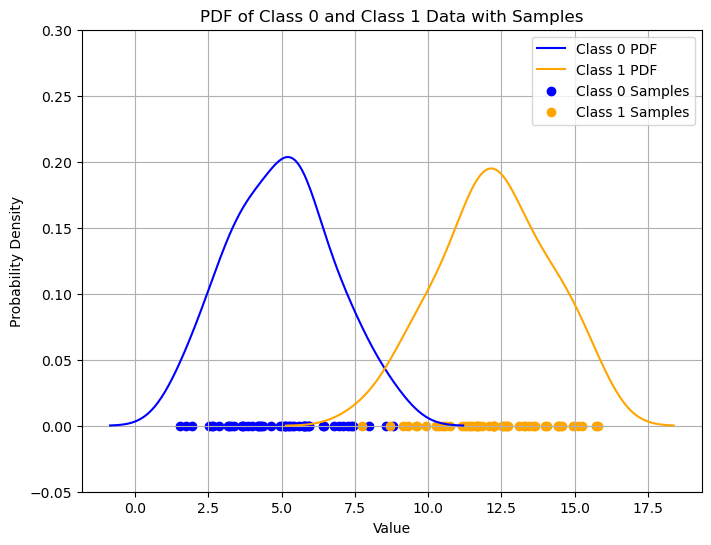

In [2]:
# Task 1: Generate samples for 1 dimensional data for 2 class
np.random.seed(0)
num_samples = 50
# 
label_0 = np.zeros(num_samples)
label_1 = np.ones(num_samples)

mu_1 = (19 + 9 ) / 2 - 2
sigma_1 = (19 -9) / 6
class_1_data = np.random.normal(mu_1, sigma_1, num_samples)
mu_0 = (12 / 4) + 2
sigma_0 = 12 / 6
class_0_data = np.random.normal(mu_0, sigma_0, num_samples)

plt.figure(figsize=(8, 6))

# Plot PDF of class_0 data
sns.kdeplot(class_0_data, color='blue', label='Class 0 PDF')

# Plot PDF of class_1 data
sns.kdeplot(class_1_data, color='orange', label='Class 1 PDF')

# Plot samples as balls on x-axis
plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', marker='o', label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='orange', marker='o', label='Class 1 Samples')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF of Class 0 and Class 1 Data with Samples')
plt.legend()
plt.ylim(-0.05, .3)
plt.grid(True)
plt.show()

mu_0, mu_1, sigma_0, sigma_1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [3]:
# Create a dataframe 
data  =  np.concatenate((class_0_data, class_1_data)) 
labels = np.concatenate((label_0, label_1))

d = {
    "feature": data,
    "Label": labels
}
df = pd.DataFrame(data =d)
df.head(), df.tail()

(    feature  Label
 0  3.209067    0.0
 1  5.773805    0.0
 2  3.978390    0.0
 3  2.638736    0.0
 4  4.943636    0.0,
       feature  Label
 95  11.269876    1.0
 96   9.912008    1.0
 97  13.295817    1.0
 98   9.310170    1.0
 99  11.645433    1.0)

In [4]:
# Finding the Intersection point between two pdf and the area of the overlapped region
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

samples = df['feature']

pdf0 = norm.pdf(samples, loc=mu_0, scale=sigma_0)
pdf1 = norm.pdf(samples, loc=mu_1, scale=sigma_1)

print((pdf0 == pdf1).any())
intersection_index = np.argmin(np.abs((pdf0-pdf1)))  # array index value

print(f"Intersection point: {samples[intersection_index]}")

cdf0 = norm.cdf(samples, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(samples, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area: {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

False
Intersection point: 8.698672552960122
0.967795364678159 0.023807051524472073
Intersection point Area: 0.05601168684631311


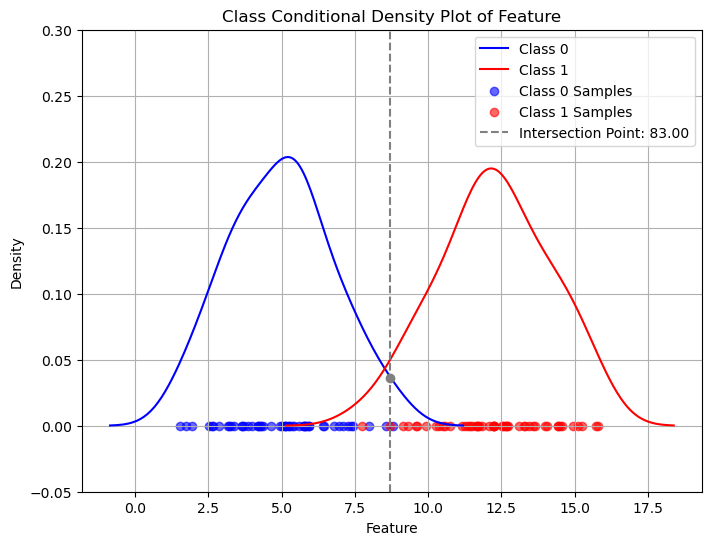

In [5]:
class_0_data = df[df['Label'] == 0]['feature']
class_1_data = df[df['Label'] == 1]['feature']

plt.figure(figsize=(8, 6))
sns.kdeplot(class_0_data, color='blue', label='Class 0')
sns.kdeplot(class_1_data, color='red', label='Class 1')

plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', alpha=0.6, label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='red', alpha=0.6, label='Class 1 Samples')

# Intersection point
plt.axvline(samples[intersection_index], color='grey', linestyle='--', label=f'Intersection Point: {intersection_index:.2f}')
plt.scatter([samples[intersection_index]], [pdf0[intersection_index]], color='grey', zorder=5)

# Additional plot settings
plt.title('Class Conditional Density Plot of Feature')
plt.ylim(-0.05, .3)
plt.xlabel('Feature')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



### Ideal classifier
This is a concept of ideal classifier from - Classifiaction at the accuracy limit: facing the problem of data ambiguity.ty

Intersection point: 8.698672552960122
Data Points with True and Predicted Labels:
      feature  Label  predicted_labels
0    3.209067    0.0               0.0
1    5.773805    0.0               0.0
2    3.978390    0.0               0.0
3    2.638736    0.0               0.0
4    4.943636    0.0               0.0
..        ...    ...               ...
95  11.269876    1.0               1.0
96   9.912008    1.0               1.0
97  13.295817    1.0               1.0
98   9.310170    1.0               1.0
99  11.645433    1.0               1.0

[100 rows x 3 columns]

Confusion Matrix:
[[49  2]
 [ 0 48]]


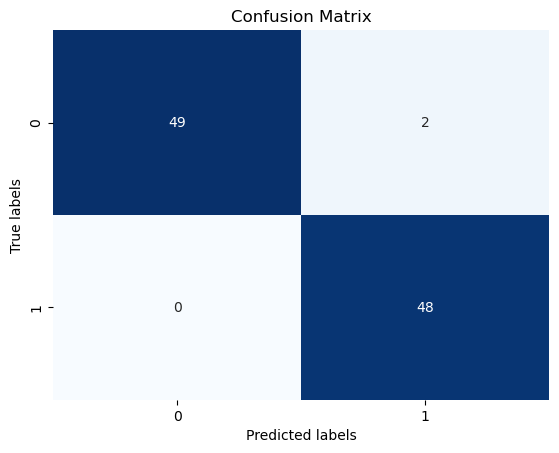


Accuracy: 0.98


In [6]:
# Ideal classifier 
intersection_point = np.argmin(np.abs((pdf0-pdf1)))
print(f"Intersection point: {samples[intersection_point]}")

predicted_labels = np.where(samples <= samples[intersection_point], 0.0, 1.0)

df["predicted_labels"] = predicted_labels

print("Data Points with True and Predicted Labels:")
print(df)

# Calculate the confusion matrix
Label = df["Label"]
TP = np.sum((Label == 0.0) & (predicted_labels == 0.0))
TN = np.sum((Label == 1.0) & (predicted_labels == 1.0))
FP = np.sum((Label == 0.0) & (predicted_labels == 0.1))
FN = np.sum((Label == 1.0) & (predicted_labels == 0.0))

confusion_matrix = np.array([[TP, FN],
                             [FP, TN]])

print("\nConfusion Matrix:")
print(confusion_matrix)
plt.figure()
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"\nAccuracy: {accuracy:.2f}")



In [7]:
samples[intersection_point], pdf0[intersection_point]

(8.698672552960122, 0.03607670021170511)

### Logistic Regression

Logistic Regression without any test dataset
Accuracy: 0.97


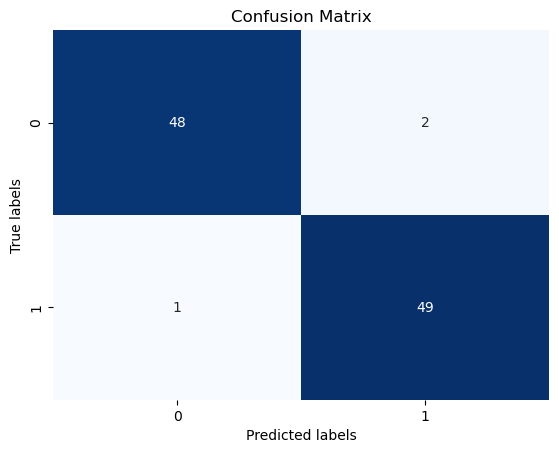

In [8]:
# Training a model Linear regression (Using all the data for training)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X, y)

# Predict testing set
y_pred = model.predict(X)

# Calculate accuracy
print("Logistic Regression without any test dataset")
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm_0 = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm_0, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest classifier

Random Forest classfier
Accuracy: 1.0


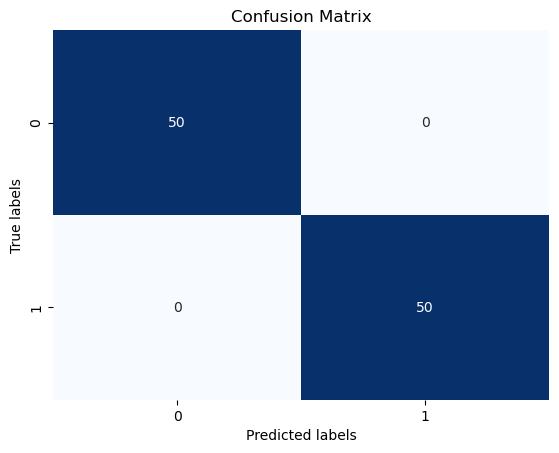

In [9]:
# Training a model Linear regression (Using all the data for training)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X, y)

# Predict testing set
y_pred = model_rf.predict(X)

# Calculate accuracy
print("Random Forest classfier")
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes Classifier

Naive Bayes Estimation
Accuracy: 0.97


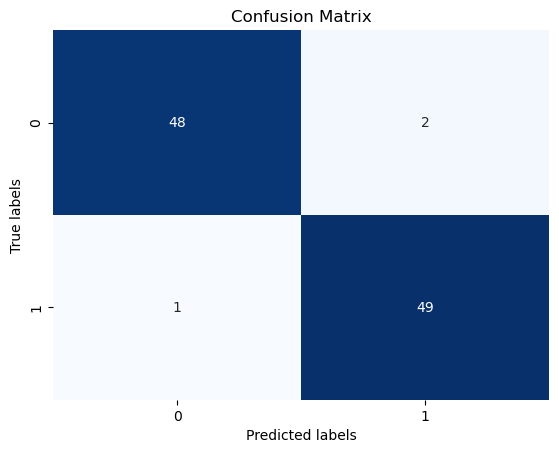

In [10]:
# Training a model with Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = GaussianNB()
model_1.fit(X, y)

y_pred = model_1.predict(X)

# Calculate the accuracy
print("Naive Bayes Estimation")
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# plotting the confusion matrix
cm1 = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Linear Regression
Accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



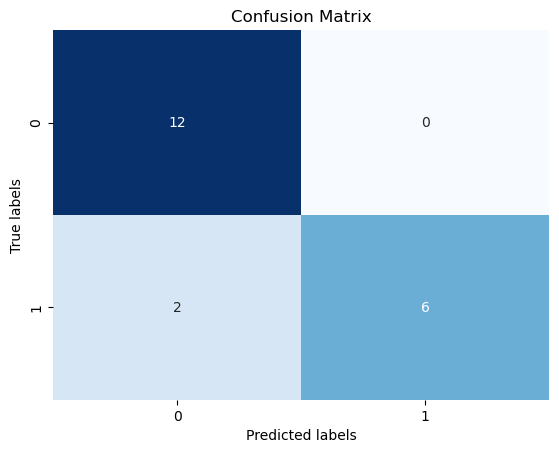

In [11]:
# Training a model Linear regression (keeping some datas for testing)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy
print("Linear Regression")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()